<a href="https://colab.research.google.com/github/vanivaranya/QIBSIP-task-5/blob/main/Sales_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

Importing dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data = pd.read_csv('/content/drive/MyDrive/Advertising.csv')

In [4]:
data

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


The advertising dataset captures sales revenue generated with respect to advertisement spends across multiple channles like radio, tv and newspaper (in dollars).

Exploratory Data Analysis

Data Analysis

In [5]:
type(data)

pandas.core.frame.DataFrame

In [6]:
data.shape

(200, 5)

In [7]:
data.columns

Index(['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [8]:
data.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [9]:
data.tail()

,Unnamed: 0,TV,Radio,Newspaper,Sales
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5
199,200,232.1,8.6,8.7,13.4


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [11]:
data.isna()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
195,False,False,False,False,False
196,False,False,False,False,False
197,False,False,False,False,False
198,False,False,False,False,False


In [12]:
data.isna().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

There's no null value in the dataset.

In [13]:
data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
195    False
196    False
197    False
198    False
199    False
Length: 200, dtype: bool

In [14]:
data.duplicated().sum()

0

There's no duplicated value as well.

In [15]:
data.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [16]:
data.dtypes

Unnamed: 0      int64
TV            float64
Radio         float64
Newspaper     float64
Sales         float64
dtype: object

In [17]:
data.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


Feature Engineering

In [18]:
# renaming the unnamed column as 'S.No.'

data.columns = ['S.No.', 'TV', 'Radio', 'NewsPaper', 'Sales']

In [19]:
data.head(3)

,S.No.,TV,Radio,NewsPaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3


In [20]:
# adding new column 'Total_Advertising_Spending' to the dataframe

data['Total_Advertising_Spending'] = data['TV'] + data['Radio'] + data['NewsPaper']

Data Visualization

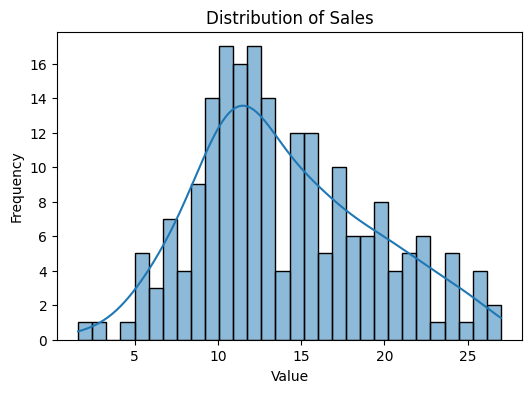

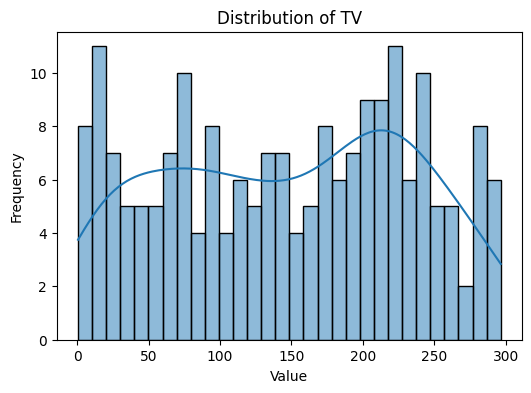

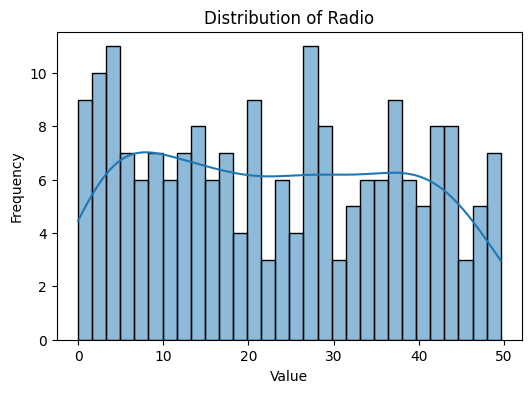

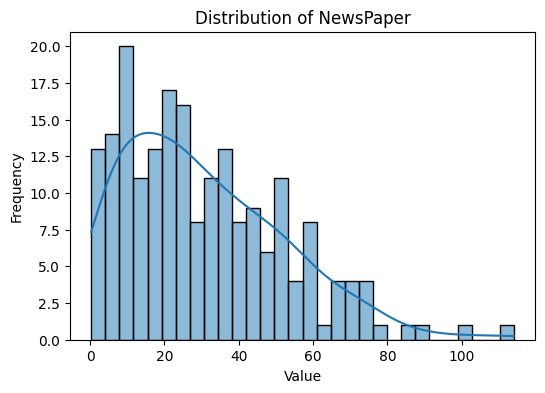

In [21]:
columns_to_plot = ['Sales', 'TV', 'Radio', 'NewsPaper']

for column in columns_to_plot:
    plt.figure(figsize=(6, 4))
    sns.histplot(data[column], bins = 30, kde = True)
    plt.title(f'Distribution of {column}')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.show()

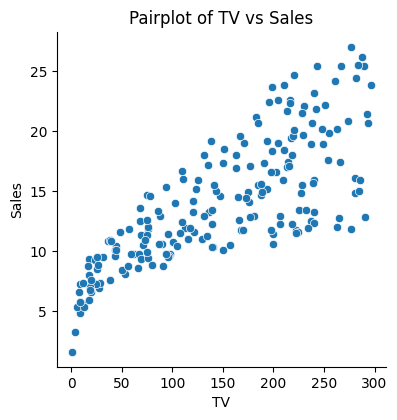

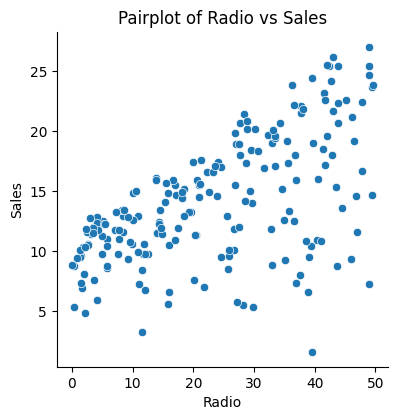

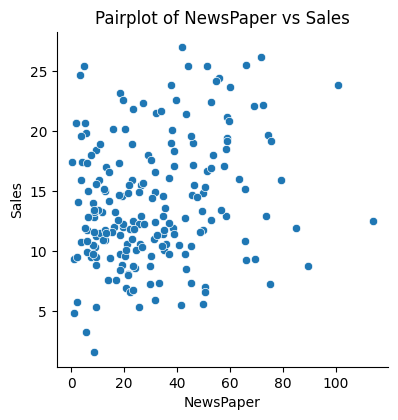

In [22]:
columns_plot = ['TV', 'Radio', 'NewsPaper']

for column in columns_plot:
    sns.pairplot(data, x_vars=column, y_vars='Sales', height = 4)
    plt.title(f'Pairplot of {column} vs Sales')
    plt.show()

Observation: TV advertising has highest positive impact on sales, followed by radio and then newspaper. So TV and radio will have higher correlation with sales.

In [23]:
corr_mat=data.corr()
corr_mat

,S.No.,TV,Radio,NewsPaper,Sales,Total_Advertising_Spending
S.No.,1.000000,0.017715,-0.110680,-0.154944,-0.051616,-0.037606
TV,0.017715,1.000000,0.054809,0.056648,0.782224,0.945330
Radio,-0.110680,0.054809,1.000000,0.354104,0.576223,0.293211
NewsPaper,-0.154944,0.056648,0.354104,1.000000,0.228299,0.343059
Sales,-0.051616,0.782224,0.576223,0.228299,1.000000,0.867712
Total_Advertising_Spending,-0.037606,0.945330,0.293211,0.343059,0.867712,1.000000


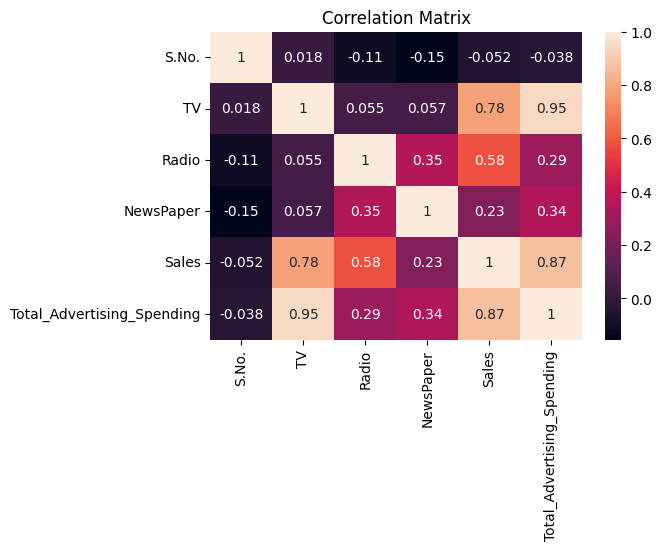

In [24]:
plt.figure(figsize = [6, 4])
sns.heatmap(corr_mat, annot = True)
plt.title("Correlation Matrix")
plt.show()

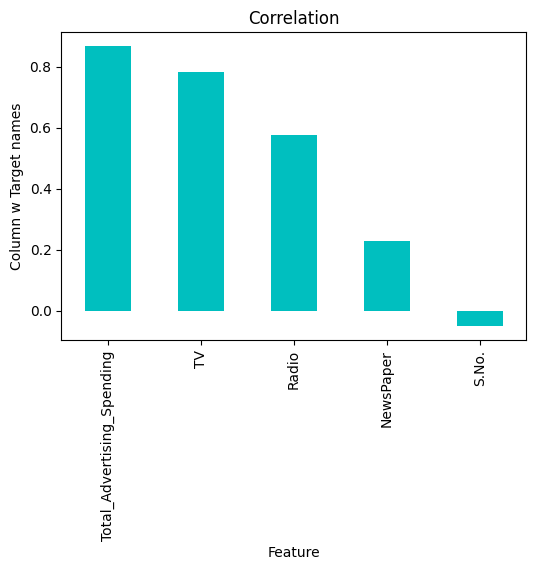

In [25]:
plt.figure(figsize = (6, 4))
data.corr()['Sales'].sort_values(ascending = False).drop(['Sales']).plot(kind = 'bar', color = 'c')
plt.xlabel('Feature')
plt.ylabel('Column w Target names')
plt.title('Correlation')
plt.show()

Modelling - Linear Regression

In [26]:
Y = data['Sales']
X = data[['TV','Radio','NewsPaper']]

In [27]:
X.shape

(200, 3)

In [28]:
Y.shape

(200,)

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
# splitting data into train and test data

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [31]:
X_train.shape, Y_train.shape

((160, 3), (160,))

In [32]:
X_test.shape, Y_test.shape

((40, 3), (40,))

In [33]:
from sklearn.linear_model import LinearRegression

In [34]:
# creating a model
model = LinearRegression()

In [35]:
# training the model using training data
model.fit(X, Y)

LinearRegression()

In [36]:
model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [37]:
model.intercept_

2.938889369459412

In [38]:
model.coef_.round(2)

array([ 0.05,  0.19, -0.  ])

In [39]:
model.score(X_train, Y_train)

0.8924042210759975

In [40]:
model.score(X_test, Y_test)

0.9107940361789811

In [41]:
#Model Evaluation

# Making predictions on the test data

Y_pred = model.predict(X_test)

In [42]:
#checking accuracy of the model through mean absolute error and r2 score

from sklearn.metrics import mean_absolute_error, r2_score

mae = mean_absolute_error(Y_test, Y_pred)
r_squared = r2_score(Y_test, Y_pred)

In [43]:
mae

1.3798309268179618

In [44]:
r_squared

0.9107940361789811

In [45]:
# Ridge Model

from sklearn.linear_model import Ridge

ridge_model = Ridge(alpha=1.0)

ridge_model.fit(X_train, Y_train)
Y_pred_ridge = ridge_model.predict(X_test)

mae_ridge = mean_absolute_error(Y_test, Y_pred_ridge)
r_squared_ridge = r2_score(Y_test, Y_pred_ridge)

from sklearn.metrics import mean_squared_error

mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 3.138684517716128
R-squared: 0.9107940361789811


Decision Tree Model

In [46]:
from sklearn.tree import DecisionTreeRegressor

model_tree = DecisionTreeRegressor(random_state=42)
model_tree.fit(X_train, Y_train)

y_pred = model_tree.predict(X_test)

mse = mean_squared_error(Y_test, y_pred)
r2 = r2_score(Y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 0.8714999999999998
R-squared: 0.9752307066762518


Random Forest Regression Model

In [47]:
from sklearn.ensemble import RandomForestRegressor

model_forest = RandomForestRegressor(random_state=42)
model_forest.fit(X_train, Y_train)

y_pred = model_forest.predict(X_test)

mse = mean_squared_error(Y_test, y_pred)
r2 = r2_score(Y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 0.4527096750000005
R-squared: 0.9871333347899326


Gradient Boosting Regression Model

In [48]:
from sklearn.ensemble import GradientBoostingRegressor

model_gb = GradientBoostingRegressor(random_state=42)
model_gb.fit(X_train, Y_train)

y_pred = model_gb.predict(X_test)

mse = mean_squared_error(Y_test, y_pred)
r2 = r2_score(Y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 0.4066947136681989
R-squared: 0.9884411466941303


In [49]:
# SVM Model

from sklearn.svm import SVR

model_svm = SVR(kernel='linear')
model_svm.fit(X_train, Y_train)

y_pred = model_svm.predict(X_test)

mse = mean_squared_error(Y_test, y_pred)
r2 = r2_score(Y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 3.731165556861991
R-squared: 0.8939548661877441


Making predictions table to understand the predictions of all models comparatively.

In [50]:
sample_data = data[['TV', 'Radio', 'NewsPaper']].sample(5)

linear_predictions = model.predict(sample_data)
tree_predictions = model_tree.predict(sample_data)
forest_predictions = model_forest.predict(sample_data)
gb_predictions = model_gb.predict(sample_data)
svm_predictions = model_svm.predict(sample_data)

sample_data['Original Value'] = data.loc[sample_data.index, 'Sales']

predictions_table = pd.DataFrame({
    'Original Value': sample_data['Original Value'],
    'Linear Regression Prediction': linear_predictions,
    'Decision Tree Prediction': tree_predictions,
    'Random Forest Prediction': forest_predictions,
    'Gradient Boosting Prediction': gb_predictions,
    'SVM Prediction': svm_predictions,
})

predictions_table

,Original Value,Linear Regression Prediction,Decision Tree Prediction,Random Forest Prediction,Gradient Boosting Prediction,SVM Prediction
86,12.0,11.598707,12.0,11.938,12.021004,12.290818
149,10.1,9.827271,10.1,9.955,9.746706,10.641013
142,20.1,19.249869,20.1,19.856,19.749088,19.407873
82,11.3,10.178408,11.3,11.327,11.296310,10.797671
115,12.6,12.919689,12.6,12.778,12.822872,13.758258


Thus, we can see Random Forest Regression Model gives the highest accuracy of 97.91 % and hence the best suited model in this case.